In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics


from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes_dataset.csv')

Saving diabetes_dataset.csv to diabetes_dataset (6).csv


In [49]:
from sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import time



#only the numerical ones are used here
features = [
    'Age', 'BMI', 'Waist_Circumference', 'HbA1c',
    'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Total',
    'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Dietary_Intake_Calories',
    'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'
]

df['Diabetes'] = (df['Fasting_Blood_Glucose'] >= 126).astype(int)

X = df[features]
y = df['Diabetes']

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

bestimator = DecisionTreeClassifier()
n_trees = 500
bagging_classifier = BaggingClassifier(estimator = bestimator, n_estimators = n_trees, random_state = 42)
bagging_classifier.fit(X_train, y_train)

start_time = time.time()
y_prediction = bagging_classifier.predict(X_test)
end_time = time.time()
time_taken = end_time - start_time

accuracyscore = accuracy_score(y_test, y_prediction)
print("Accuracy with 500 Trees (Bagged): ")
print(accuracyscore)
print("Total Time: ")
print(time_taken)




Accuracy with 100 Tree (Bagged): 
0.542
Total Time: 
0.30222272872924805


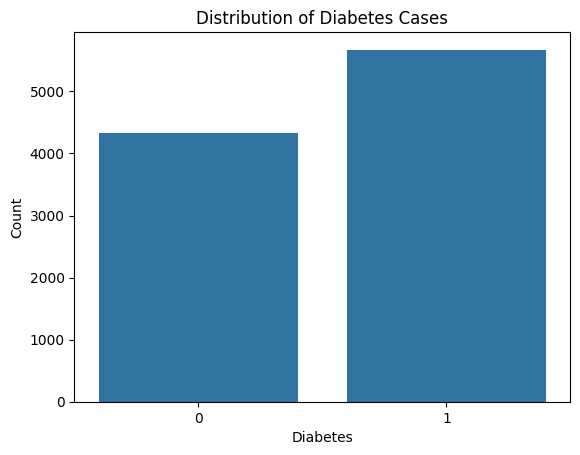

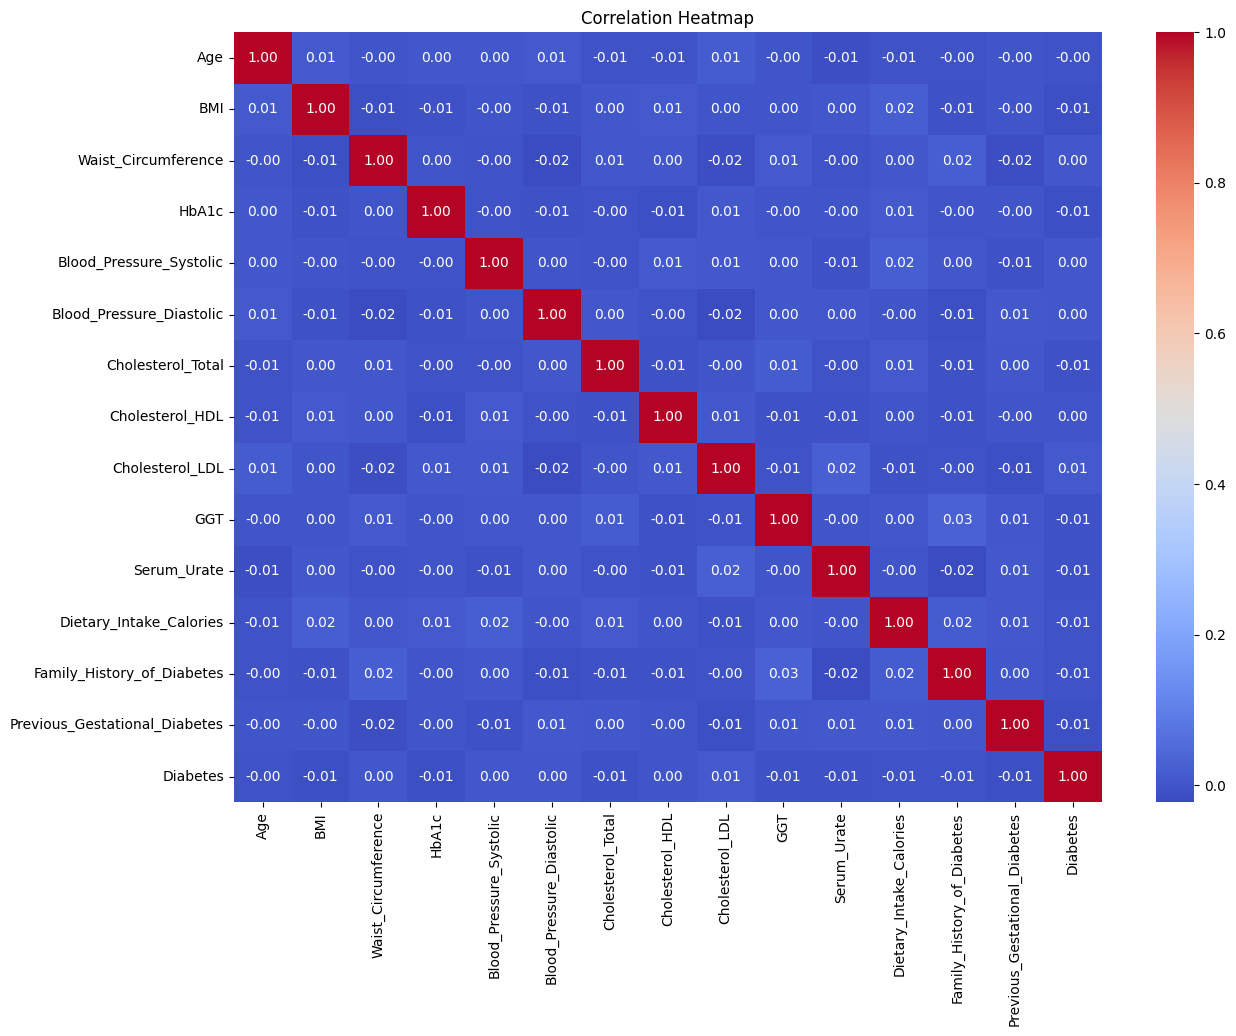

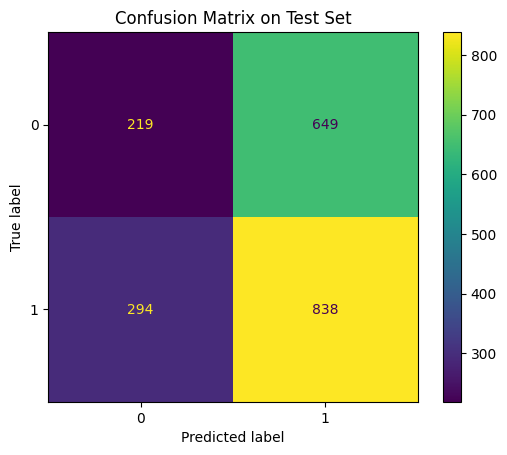

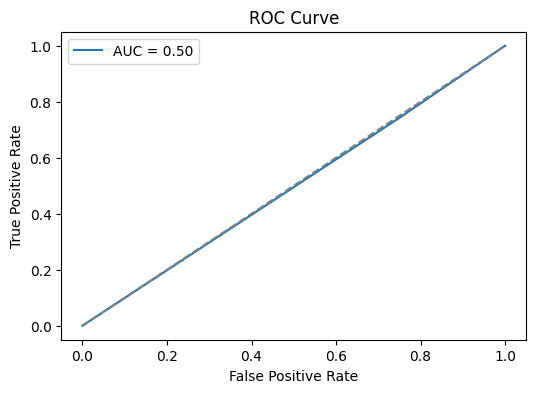

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14,10))
sns.heatmap(df[features + ['Diabetes']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix on Test Set')
plt.show()

from sklearn.metrics import roc_curve, auc

y_probs = bagging_classifier.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()